In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
data = pd.read_csv("merged_file.csv",encoding="latin_1",low_memory=False) #análisis de todos los años
# data = pd.read_csv("datasets/Cierre_agr_mun_2021.csv",encoding="latin_1",low_memory=False) #análisis por año
# data_t = np.transpose(data)
data

,Anio,Idestado,Nomestado,Idddr,Nomddr,Idcader,Nomcader,Idmunicipio,Nommunicipio,Idciclo,...,Nomunidad,Idcultivo,Nomcultivo,Sembrada,Cosechada,Siniestrada,Volumenproduccion,Rendimiento,Preciomediorural,Valorproduccion
0,2022,1,Aguascalientes,1,Aguascalientes,1,Aguascalientes,1,Aguascalientes,1,...,Tonelada,5490000,Avena forrajera en verde,1180.0,1180.0,0.0,31270,26.50,565.13,17671615.10
1,2022,1,Aguascalientes,1,Aguascalientes,1,Aguascalientes,1,Aguascalientes,1,...,Tonelada,5670000,BrÃÂ³coli,45.0,45.0,0.0,810,18.00,3805.33,3082317.30
2,2022,1,Aguascalientes,1,Aguascalientes,1,Aguascalientes,1,Aguascalientes,1,...,Tonelada,5900000,Cebada forrajera en verde,10.0,10.0,0.0,280,28.00,590.00,165200.00
3,2022,1,Aguascalientes,1,Aguascalientes,1,Aguascalientes,1,Aguascalientes,1,...,Tonelada,9090000,Triticale forrajero en verde,300.0,300.0,0.0,9180,30.60,550.00,5049000.00
4,2022,1,Aguascalientes,1,Aguascalientes,1,Aguascalientes,1,Aguascalientes,1,...,Tonelada,15050000,Pastos y praderas,527.5,527.5,0.0,26290.6,49.84,520.00,13671112.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94952,2020,32,Zacatecas,190,Jalpa,4,Jalpa,19,Jalpa,3,...,Tonelada,7390000,LimÃÂ³n,196.15,110.0,0.0,864.3,7.86,4711.60,4072235.88
94953,2020,32,Zacatecas,190,Jalpa,4,Jalpa,19,Jalpa,3,...,Tonelada,7920000,Nopalitos,264.0,264.0,0.0,8712.0,33.00,4349.41,37892059.92
94954,2020,32,Zacatecas,190,Jalpa,4,Jalpa,19,Jalpa,3,...,Tonelada,7960000,Nuez,10.0,10.0,0.0,22.0,2.20,53000.00,1166000.00
94955,2020,32,Zacatecas,190,Jalpa,4,Jalpa,19,Jalpa,3,...,Tonelada,9130000,Uva,20.0,20.0,0.0,182.7,9.14,26800.00,4896360.00


In [7]:
#creación de listas de los subsets relevantes
nomcultivo = list(data[("Nomcultivo")])
idcultivo = list(data[("Idcultivo")])
idestado = list(data[("Idestado")])

#contador de números únicos para determinar variedad de cultivos
def count_unique_numbers(numbers):
    unique_numbers = set(numbers)
    return len(unique_numbers)

unique_cultivos = count_unique_numbers(idcultivo)
unique_cultivos

326

In [4]:
#diccionario de cultivos y su frecuencia
def cultivos_dic(numbers):
    count_dict = {}

    for number in numbers:
        if number in count_dict:
            count_dict[number] += 1
        else:
            count_dict[number] = 1

    return count_dict

cultivos_dic(nomcultivo)

{'Avena forrajera en verde': 4541,
 'BrÃ\x83Â³coli': 679,
 'Cebada forrajera en verde': 214,
 'Triticale forrajero en verde': 81,
 'Pastos y praderas': 1402,
 'Chile verde': 2652,
 'Fresa': 276,
 'MaÃ\x83Â\xadz forrajero en verde': 2288,
 'MaÃ\x83Â\xadz grano': 13819,
 'Sorgo forrajero en verde': 2111,
 'Tomate rojo (jitomate)': 3661,
 'Tomate verde': 2308,
 'Zanahoria': 614,
 'Frijol': 8512,
 'Alfalfa verde': 2251,
 'Durazno': 1605,
 'Granada': 199,
 'Membrillo': 50,
 'Nopalitos': 685,
 'Nuez': 851,
 'Uva': 332,
 'Agave': 1206,
 'Nopal forrajero': 44,
 'Tuna': 492,
 'Acelga': 77,
 'Betabel': 68,
 'Cebolla': 1782,
 'Cilantro': 301,
 'Col (repollo)': 218,
 'Coliflor': 475,
 'Lechuga': 783,
 'RÃ\x83Â¡bano': 135,
 'ChÃ\x83Â\xadcharo': 254,
 'EspÃ\x83Â¡rrago': 261,
 'Calabacita': 2239,
 'Espinaca': 70,
 'Ejote': 178,
 'Elote': 1127,
 'Cacahuate': 367,
 'Pepino': 1387,
 'Aguacate': 2216,
 'Guayaba': 447,
 'Higo': 63,
 'Lima': 56,
 'LimÃ\x83Â³n': 2112,
 'Manzana': 1119,
 'Naranja': 1537,
 'P

In [5]:
#determinación de los 5 cultivos más frecuentes
def most_frequent(lst, n=5):
    # Count occurrences of each number in the list
    counts = Counter(lst)

    # Get the n most common numbers and their frequencies
    most_common = counts.most_common(n)

    return most_common

principales = most_frequent(nomcultivo)

<BarContainer object of 5 artists>

([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

Text(0.5, 0, 'Cultivos')

Text(0, 0.5, 'Frecuencia')

Text(0.5, 1.0, 'Principales cultivos 2020 a 2022 (Nacional)')

/tmp/ipykernel_24628/4215080757.py:9: UserWarning: Glyph 131 (\x83) missing from current font.
  plt.savefig("principal_full.jpg",bbox_inches="tight")
/usr/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 131 (\x83) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


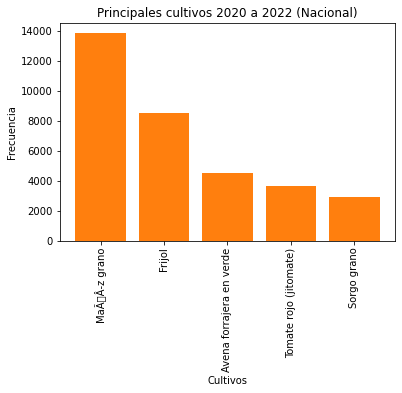

In [6]:
#histograma de los principales cultivos
numbers, frequencies = zip(*principales)

# Plotting the histogram
plt.bar(numbers, frequencies, color='tab:orange')
plt.xticks(rotation='vertical')
plt.xlabel('Cultivos')
plt.ylabel('Frecuencia')
plt.title('Principales cultivos 2020 a 2022 (Nacional)')
# plt.savefig("principal_full.jpg",bbox_inches="tight")
plt.show()

In [9]:
#mismo proceso pero para chihuahua, tiene Idestado = 8
cultivos_chihuahua = []
for i in range(len(idestado)):
    if idestado[i] == 8:
        cultivos_chihuahua.append(nomcultivo[i])

In [10]:
unique_cultivos_8 = count_unique_numbers(cultivos_chihuahua)
unique_cultivos_8

65

In [11]:
cultivos_dic(cultivos_chihuahua)
principales_8 = most_frequent(cultivos_chihuahua)

{'Ajo': 20,
 'Avena forrajera en verde': 342,
 'Avena grano': 68,
 'Semilla de avena grano': 18,
 'Cebada grano': 38,
 'Trigo grano': 82,
 'AlgodÃ\x83Â³n hueso': 59,
 'Cebolla': 143,
 'Chile seco': 34,
 'Chile verde': 94,
 'Frijol': 229,
 'MaÃ\x83Â\xadz grano': 241,
 'MelÃ\x83Â³n': 36,
 'SandÃ\x83Â\xada': 58,
 'Sorgo forrajero en verde': 161,
 'Sorgo grano': 26,
 'Tomate verde': 18,
 'Alfalfa achicalada': 155,
 'Durazno': 18,
 'Manzana': 92,
 'Nuez': 128,
 'Uva': 39,
 'Pastos y praderas': 42,
 'Calabaza': 1,
 'Elote': 12,
 'Girasol': 2,
 'MaÃ\x83Â\xadz forrajero en verde': 209,
 'Papa': 51,
 'Cereza': 3,
 'EspÃ\x83Â¡rrago': 1,
 'Viveros de durazno': 1,
 'Trigo forrajero verde': 12,
 'Cacahuate': 20,
 'Pera': 4,
 'Triticale forrajero en verde': 21,
 'Pistache': 8,
 'Pepino': 22,
 'Betabel': 5,
 'Calabacita': 26,
 'Tomate rojo (jitomate)': 19,
 'Semilla de trigo grano': 10,
 'Fresa': 3,
 'Viveros de manzana': 2,
 'Cebada forrajera en verde': 2,
 'Semilla de frijol': 1,
 'Semilla de papa'

<BarContainer object of 5 artists>

([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

Text(0.5, 0, 'Cultivos')

Text(0, 0.5, 'Frecuencia')

Text(0.5, 1.0, 'Principales cultivos 2020 a 2022 (Chihuahua)')

/tmp/ipykernel_24628/2581999379.py:9: UserWarning: Glyph 131 (\x83) missing from current font.
  plt.savefig("chihuahua_full.jpg",bbox_inches="tight")
/usr/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 131 (\x83) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


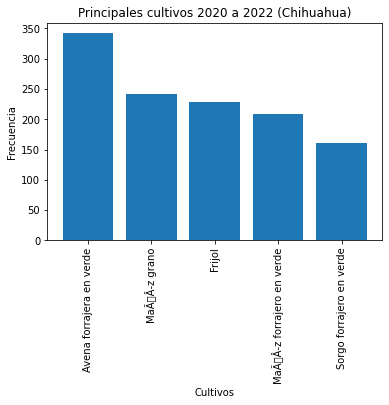

In [13]:
numbers_8, frequencies_8 = zip(*principales_8)

# Plotting the histogram
plt.bar(numbers_8, frequencies_8, color='tab:blue')
plt.xticks(rotation='vertical')
plt.xlabel('Cultivos')
plt.ylabel('Frecuencia')
plt.title('Principales cultivos 2020 a 2022 (Chihuahua)')
# plt.savefig("chihuahua_full.jpg",bbox_inches="tight")
plt.show()